# Chapter 06

1️⃣ MNIST 학습하기

In [4]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot = True)   # MNIST데이터를 내려받고 레이블은 원-핫 인코딩 방식으로 읽어들임

# 신경망 모델 구성
X = tf.placeholder(tf.float32, [None,784])  # 손글씨 이미지는 28*28 픽셀로 이루어짐-> 784개의 특징으로 이루어짐
Y = tf.placeholder(tf.float32, [None,10])   # 레이블은 0~9 이기 때문에 10개 분류로 나누면 됨

W1 = tf.Variable(tf.random_normal([784,256], stddev = 0.01))  #  표준편차가 0.01인 정규분포를 가지는 임의의 값으로 뉴런을 초기화
L1 = tf.nn.relu(tf.matmul(X,W1))   #  tf.matmul함수를 이용하여 각 계층으로 들어오는 입력값에 각각의 가중치를 곱하고 tf.nn.relu함수를 활성화 함수로 ReLU를 사용하는 신경망 계층 만듦

W2 = tf.Variable(tf.random_normal([256,256], stddev = 0.01))
L2 = tf.nn.relu(tf.matmul(L1,W2))

W3 = tf.Variable(tf.random_normal([256,10], stddev = 0.01))
model = tf.matmul(L2,W3)   # # 요소 10개짜리 배열이 출력됨. 가장 큰 값을 갖는 인덱스가 예측 결과에 가까운 숫자. 출력층에는 보통 활성화 함수를 사용하지 않음

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = model, labels = Y))  # 각 이미지에 대한 손실값 구하고 미니배치의 평균 손실값을 구함
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)  # 손실값을 최소화하는 최적화를 수행하도록 함

# 신경망 모델 학습
init = tf.global_variables_initializer()    # 신경망 모델 초기화
sess = tf.Session()
sess.run(init)

batch_size = 100
# 학습데이터의 총 개수인 mnist.trian.num_examples를 배치크기로 나눠 미니 배치가 총 몇 개인지를 저장함
total_batch = int(mnist.train.num_examples / batch_size)  # ex.전체 데이터가 50,000개이고 batch size가 100이면 total_batch는 50번

for epoch in range(15):
    total_cost = 0
    
    for i in range(total_batch):   # 미니배치의 총 개수만큼 반복하여 학습. 배치 사이즈(100번) 당 cost값이 하나 나옴. total_batch가 50번이면 50개 cost값 갖게 되는거
        batch_xs , batch_ys = mnist.train.next_batch(batch_size)    # mnist.train.next_batch(batch_size) 함수를 이용해 학습할 데이터를 배치 크기만큼 가져옴
        
        _, cost_val = sess.run([optimizer,cost], feed_dict = {X:batch_xs, Y: batch_ys})  # 가져온 뒤 입력값인 이미지 데이터는 batch_xs에, 출력값인 레이블 데이터는 batch_ys에 저장
        total_cost +=cost_val
        
    print('Epoch:', '%04d' %(epoch+1), 'Avg.cost=', '{:.3f}'.format(total_cost/total_batch))
    
print('최적화 완료!')

# 결과 확인
is_correct = tf.equal(tf.argmax(model,1), tf.argmax(Y,1))   # 예측결과인 model의 값과 실제 레이블 Y의 값 비교
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy, feed_dict = {X:mnist.test.images, Y: mnist.test.labels}))

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Avg.cost= 0.401
Epoch: 0002 Avg.cost= 0.145
Epoch: 0003 Avg.cost= 0.094
Epoch: 0004 Avg.cost= 0.068
Epoch: 0005 Avg.cost= 0.053
Epoch: 0006 Avg.cost= 0.041
Epoch: 0007 Avg.cost= 0.032
Epoch: 0008 Avg.cost= 0.024
Epoch: 0009 Avg.cost= 0.018
Epoch: 0010 Avg.cost= 0.020
Epoch: 0011 Avg.cost= 0.013
Epoch: 0012 Avg.cost= 0.013
Epoch: 0013 Avg.cost= 0.016
Epoch: 0014 Avg.cost= 0.009
Epoch: 0015 Avg.cost= 0.010
최적화 완료!
정확도: 0.977


2️⃣ 드롭아웃

In [6]:
import tensorflow as tf
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot = True)

# 신경망 모델 구성
X = tf.placeholder(tf.float32, [None,784])
Y = tf.placeholder(tf.float32, [None,10])
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([784,256], stddev = 0.01)) 
L1 = tf.nn.relu(tf.matmul(X,W1)) 
L1 = tf.nn.dropout(L1,keep_prob)

W2 = tf.Variable(tf.random_normal([256,256], stddev = 0.01))
L2 = tf.nn.relu(tf.matmul(L1,W2))
L2 = tf.nn.dropout(L2,keep_prob)

W3 = tf.Variable(tf.random_normal([256,10], stddev = 0.01))
model = tf.matmul(L2,W3) 

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = model, labels= Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

# 신경망 모델 학습
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(30):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys  = mnist.train.next_batch(batch_size)
        
        _, cost_val = sess.run([optimizer,cost], feed_dict = {X:batch_xs, Y:batch_ys, keep_prob : 0.8})
        
        total_cost += cost_val
        
    print('Epoch:','%04d' %(epoch+1), 'Avg. cost=', '{:.3f}'.format(total_cost/total_batch))
    
print('최적화 완료!')

# 결과 확인
is_correct = tf.equal(tf.argmax(model,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy, feed_dict = {X:mnist.test.images, Y: mnist.test.labels, keep_prob:1}))

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch: 0001 Avg. cost= 0.426
Epoch: 0002 Avg. cost= 0.160
Epoch: 0003 Avg. cost= 0.111
Epoch: 0004 Avg. cost= 0.089
Epoch: 0005 Avg. cost= 0.072
Epoch: 0006 Avg. cost= 0.061
Epoch: 0007 Avg. cost= 0.051
Epoch: 0008 Avg. cost= 0.048
Epoch: 0009 Avg. cost= 0.040
Epoch: 0010 Avg. cost= 0.038
Epoch: 0011 Avg. cost= 0.035
Epoch: 0012 Avg. cost= 0.030
Epoch: 0013 Avg. cost= 0.029
Epoch: 0014 Avg. cost= 0.028
Epoch: 0015 Avg. cost= 0.024
Epoch: 0016 Avg. cost= 0.025
Epoch: 0017 Avg. cost= 0.021
Epoch: 0018 Avg. cost= 0.024
Epoch: 0019 Avg. cost= 0.021
Epoch: 0020 Avg. cost= 0.021
Epoch: 0021 Avg. cost= 0.020
Epoch: 0022 Avg. cost= 0.018
Epoch: 0023 Avg. cost= 0.018
Epoch: 0024 Avg.

3️⃣ matplotlib

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Avg. cost= 0.431
Epoch: 0002 Avg. cost= 0.164
Epoch: 0003 Avg. cost= 0.116
Epoch: 0004 Avg. cost= 0.089
Epoch: 0005 Avg. cost= 0.071
Epoch: 0006 Avg. cost= 0.059
Epoch: 0007 Avg. cost= 0.050
Epoch: 0008 Avg. cost= 0.046
Epoch: 0009 Avg. cost= 0.041
Epoch: 0010 Avg. cost= 0.036
Epoch: 0011 Avg. cost= 0.034
Epoch: 0012 Avg. cost= 0.031
Epoch: 0013 Avg. cost= 0.026
Epoch: 0014 Avg. cost= 0.027
Epoch: 0015 Avg. cost= 0.026
Epoch: 0016 Avg. cost= 0.024
Epoch: 0017 Avg. cost= 0.024
Epoch: 0018 Avg. cost= 0.023
Epoch: 0019 Avg. cost= 0.018
Epoch: 0020 Avg. cost= 0.022
Epoch: 0021 Avg. cost= 0.020
Epoch: 0022 Avg. cost= 0.020
Epoch: 0023 Avg. cost= 0.019
Epoch: 0024 Avg. cost= 0.018
Epoch: 0025 Avg. cost= 0.017
Epoch: 0026 Avg. cost= 0.018
Epoch: 0027 Avg. cost= 0.017
Epoch: 0028 Avg

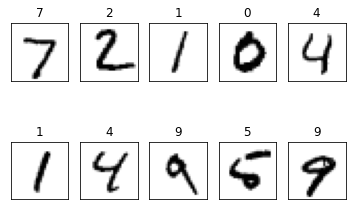

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot = True)

# 신경망 모델 구성
X = tf.placeholder(tf.float32, [None,784])
Y = tf.placeholder(tf.float32, [None,10])
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([784,256], stddev = 0.01)) 
L1 = tf.nn.relu(tf.matmul(X,W1)) 
L1 = tf.nn.dropout(L1,keep_prob)

W2 = tf.Variable(tf.random_normal([256,256], stddev = 0.01))
L2 = tf.nn.relu(tf.matmul(L1,W2))
L2 = tf.nn.dropout(L2,keep_prob)

W3 = tf.Variable(tf.random_normal([256,10], stddev = 0.01))
model = tf.matmul(L2,W3) 

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = model, labels= Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

# 신경망 모델 학습
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(30):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys  = mnist.train.next_batch(batch_size)
        
        _, cost_val = sess.run([optimizer,cost], feed_dict = {X:batch_xs, Y:batch_ys, keep_prob : 0.8})
        
        total_cost += cost_val
        
    print('Epoch:','%04d' %(epoch+1), 'Avg. cost=', '{:.3f}'.format(total_cost/total_batch))
    
print('최적화 완료!')

# 결과 확인
is_correct = tf.equal(tf.argmax(model,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy, feed_dict = {X:mnist.test.images, Y: mnist.test.labels, keep_prob:1}))

# 결과 확인(matplotlib)

labels = sess.run(model, feed_dict = {X:mnist.test.images, Y:mnist.test.labels, keep_prob :1})
fig = plt.figure()
for i in range(10):
    subplot = fig.add_subplot(2,5,i+1)  # 2행 5열의 그래프 만들고 i+1번째에 숫자 이미지를 출력
    #이미지를 깨끗하게 출력하기 위해 x와 y의 눈금을 출력하지 않음
    subplot.set_xticks([])
    subplot.set_yticks([])
    #결과값인 labels의i번째 요소가 원-핫 인코딩 형식으로 되어있으므로 해당 배열에서 가장 높은 값을 가진 인덱스를 예측한 숫자로 출력
    subplot.set_title('%d' % np.argmax(labels[i]))
    #1차원 배열로 되어있는 i번째 이미지 데이터를 28 * 28형식의 2차원 배열로 변형하여 이미지 형태로 출력. cmap파라미터를 통해 이미지를 그레이 스케일로 출력
    subplot.imshow(mnist.test.images[i].reshape((28,28)),cmap = plt.cm.gray_r)